In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data_path = '../data/raw/Train.csv'

In [3]:
df = pd.read_csv(data_path)
df = df.set_index('ID')

In [4]:
list_cols = ['LandPreparationMethod', 'NursDetFactor', 'TransDetFactor', 'OrgFertilizers', 'CropbasalFerts', 'FirstTopDressFert']

cat_cols = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 
            'PCropSolidOrgFertAppMethod', 'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method', 'Stubble_use']

num_cols = ['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 
            'StandingWater', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea', '1appDaysUrea', 
            '2tdUrea', '2appDaysUrea', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre', 'Yield']

date_cols = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date']

In [5]:
columns = list_cols + cat_cols + num_cols + date_cols

In [6]:
len(columns) == len(df.columns)

True

## Process list columns

In [7]:
for col in list_cols:
    split_col = df[col].str.split().explode()
    split_col = pd.get_dummies(split_col, prefix=col, prefix_sep='')
    split_col = split_col.astype(int).groupby(level=0).max()
    df = df.join(split_col)
    df = df.drop(columns=[col])

## Process post list columns

### FYM

In [8]:
# Assumption: CropOrgFYM correlated with OrgFertilizersFYM
df_0 = df[['CropOrgFYM', 'OrgFertilizersFYM']][df['OrgFertilizersFYM'] == 0]
df_1 = df[['CropOrgFYM', 'OrgFertilizersFYM']][df['OrgFertilizersFYM'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

CropOrgFYM           2672
OrgFertilizersFYM       0
dtype: int64 
 CropOrgFYM           1.0
OrgFertilizersFYM    0.0
dtype: float64 

CropOrgFYM           2
OrgFertilizersFYM    0
dtype: int64 
 CropOrgFYM           0.001669
OrgFertilizersFYM    0.000000
dtype: float64


### Ganaura

In [9]:
# Assumption: Ganaura correlated with OrgFertilizersGanaura
df_0 = df[['Ganaura', 'OrgFertilizersGanaura']][df['OrgFertilizersGanaura'] == 0]
df_1 = df[['Ganaura', 'OrgFertilizersGanaura']][df['OrgFertilizersGanaura'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

Ganaura                  2406
OrgFertilizersGanaura       0
dtype: int64 
 Ganaura                  1.0
OrgFertilizersGanaura    0.0
dtype: float64 

Ganaura                  11
OrgFertilizersGanaura     0
dtype: int64 
 Ganaura                  0.007514
OrgFertilizersGanaura    0.000000
dtype: float64


### DAP

In [10]:
# Assumption: BasalDAP correlated with CropbasalFertsDAP
df_0 = df[['BasalDAP', 'CropbasalFertsDAP']][df['CropbasalFertsDAP'] == 0]
df_1 = df[['BasalDAP', 'CropbasalFertsDAP']][df['CropbasalFertsDAP'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

df_0 = df[['BasalDAP', 'FirstTopDressFertDAP']][df['FirstTopDressFertDAP'] == 0]
df_1 = df[['BasalDAP', 'FirstTopDressFertDAP']][df['FirstTopDressFertDAP'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

BasalDAP             543
CropbasalFertsDAP      0
dtype: int64 
 BasalDAP             1.0
CropbasalFertsDAP    0.0
dtype: float64 

BasalDAP             0
CropbasalFertsDAP    0
dtype: int64 
 BasalDAP             0.0
CropbasalFertsDAP    0.0
dtype: float64
BasalDAP                335
FirstTopDressFertDAP      0
dtype: int64 
 BasalDAP                0.101454
FirstTopDressFertDAP    0.000000
dtype: float64 

BasalDAP                208
FirstTopDressFertDAP      0
dtype: int64 
 BasalDAP                0.366197
FirstTopDressFertDAP    0.000000
dtype: float64


### Urea

In [11]:
# Assumption: BasalUrea correlated with CropbasalFertsUrea and 1tdUrea correlated with FirstTopDressFertUrea
df[['BasalUrea', '1tdUrea', 'CropbasalFertsUrea', 'FirstTopDressFertUrea']]

df_0 = df[['BasalUrea', 'CropbasalFertsUrea']][df['CropbasalFertsUrea'] == 0]
df_1 = df[['BasalUrea', 'CropbasalFertsUrea']][df['CropbasalFertsUrea'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

df_0 = df[['1tdUrea', 'FirstTopDressFertUrea']][df['FirstTopDressFertUrea'] == 0]
df_1 = df[['1tdUrea', 'FirstTopDressFertUrea']][df['FirstTopDressFertUrea'] == 1]

print(df_0.isnull().sum(), '\n', df_0.isnull().sum() / len(df_0), '\n')
print(df_1.isnull().sum(), '\n', df_1.isnull().sum() / len(df_1))

BasalUrea             1675
CropbasalFertsUrea       0
dtype: int64 
 BasalUrea             1.0
CropbasalFertsUrea    0.0
dtype: float64 

BasalUrea             29
CropbasalFertsUrea     0
dtype: int64 
 BasalUrea             0.013212
CropbasalFertsUrea    0.000000
dtype: float64
1tdUrea                  556
FirstTopDressFertUrea      0
dtype: int64 
 1tdUrea                  1.0
FirstTopDressFertUrea    0.0
dtype: float64 

1tdUrea                  0
FirstTopDressFertUrea    0
dtype: int64 
 1tdUrea                  0.0
FirstTopDressFertUrea    0.0
dtype: float64


### Columns processing

In [12]:
corr_list_cols = [('CropOrgFYM', 'OrgFertilizersFYM'), ('Ganaura', 'OrgFertilizersGanaura'), ('BasalDAP', 'CropbasalFertsDAP'), ('BasalUrea', 'CropbasalFertsUrea'), ('1tdUrea', 'FirstTopDressFertUrea')]

In [13]:
for col1, col2 in corr_list_cols:
    df.loc[df[col2] == 0, col1] = 0
    df = df.drop(columns=[col2])

## Process date columns

In [14]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}Year'] = df[col].dt.year.astype('string')
    df[f'{col}DayOfYear'] = df[col].dt.dayofyear
    df[f'{col}DayOfYearSin'] = np.sin(2 * np.pi * df[f'{col}DayOfYear'] / 365)
    df[f'{col}DayOfYearCos'] = np.cos(2 * np.pi * df[f'{col}DayOfYear'] / 365)
    cat_cols.append(f'{col}Year')
    df = df.drop(columns=[col, f'{col}DayOfYear'])

## One hot encoding

In [15]:
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
    ohe_col = pd.get_dummies(df[col], prefix=col, prefix_sep='')
    ohe_col = ohe_col.astype(int).groupby(level=0).max()
    df = df.join(ohe_col)
    df = df.drop(columns=[col])

## Missing values

In [16]:
# delete columns
missing_column_thr = 50
missing_column = df.isnull().sum() / len(df) * 100 > missing_column_thr
to_delete_cols = missing_column[missing_column].index.tolist()
df = df.drop(columns=to_delete_cols)

In [17]:
fill_mode = 'median' # or 'median'

missing_column = df.isnull().sum() / len(df) * 100 > 0
to_fill_cols = missing_column[missing_column].index.tolist()

to_fill_values = []
for col in to_fill_cols:
    if fill_mode == 'mean':
        value = df[col].mean()
        df[col] = df[col].fillna(value)
    elif fill_mode == 'median':
        value = df[col].median()
        df[col] = df[col].fillna(value)
    else:
        raise ValueError('Unknown filling mode')

    to_fill_values.append({col: value})

In [18]:
unique_value_cols = []

for col in df.columns:
    num_unique_values = len(df[col].unique())
    
    if num_unique_values == 1:
        df = df.drop(columns=[col])
        unique_value_cols.append(col)

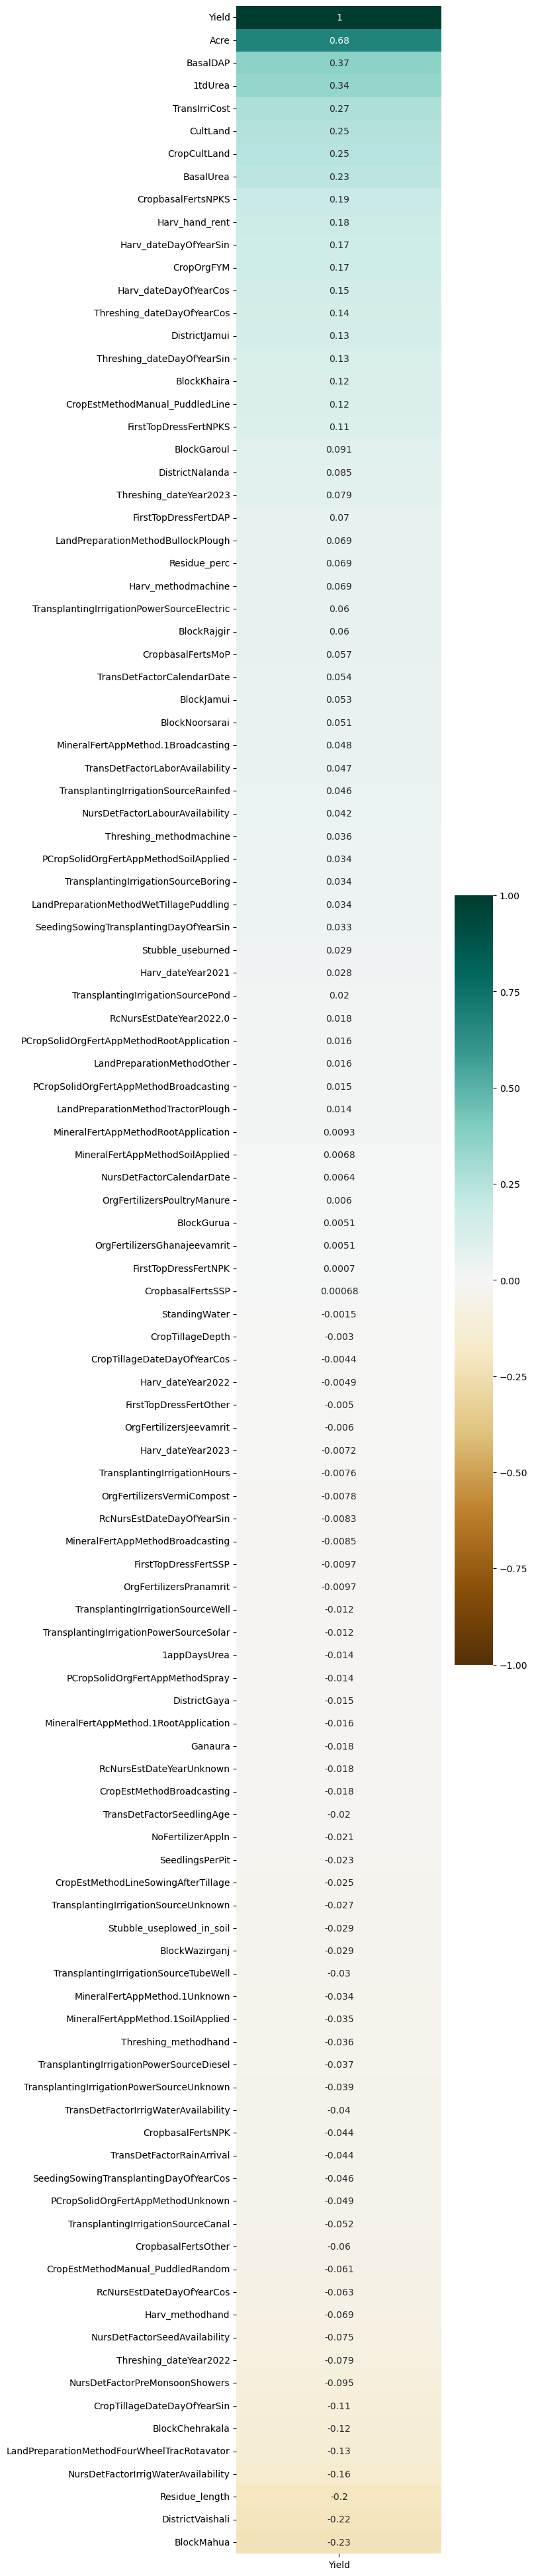

In [19]:
plt.figure(figsize=(5, 50))
heatmap = sns.heatmap(df.corr()[['Yield']].sort_values(by='Yield', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.savefig('seaborn_plot.png')